# Introdução ao Curso e Classificando Instrumentos

**Objetivos**
1. Passar para os discentes qual será o ambiente base que vamos utilizar neste curso
1. Listar quais são as bibliotecas necessárias
1. Um pequeno tutorial de instalação de pacotes

**Resultado Esperado**
1. Um pequeno ambiente com miniconda além das bibliotecas que vamos utilizar
1. Principalmente relevante para discentes que não tem tanto conhecimento de Python

Este notebook deve explorar um pouco do ciclo de trabalho completo do profissional de MIR!

![alt text](fig-0.png)

## Pacotes Necessários


Para seguir os notebooks da matéria você vai precisar de alguns pacotes base em Python. Em particular, sugiro inicialmente uma instalação do [Anaconda](https://www.anaconda.com/products/individual). A distribuição Python Anaconda é uma solução para ciência de dados que já contém boa parte das dependências que precisamos. 

**Além do Anaconda**

Depois de instalar o Anaconda, recomendo que instale ao menos dois pacotes. O LibRosa e o ffmpeg. Para tal, execute o comando abaixo na sua linha de comandos:

```bash
pip install librosa ffmpeg
```

## Imports básicos

Código Python não é tão diferente de outras linguagens. Geralmente vamos precisar de algumas bibliotecas. Para isto, fazemos um import. Abaixo estamos usando:

1. Biblioteca de plots, `matplotlib`
1. Biblioteca de vetores, `numpy`
1. Biblioteca de tabelas `pandas`.

Além dos pacotes acima, este tutorial de hoje também vai fazer uso do [Scikit-Learn](https://scikit-learn.org/). A mesma é a biblioteca de fato de uso de aprendizado de máquina em Python. 

Todas as bibliotecas já devem ter vindo no Anaconda.

Você já deve ter usado algumas dessas no curso de `Álgebra Linear Computacional`. Caso tenha feita o curso em `scilab`, não tem problemas. Python tem uma sintaxe simples que não deve ser problema para um aluno do quarto período. Veja o Capítulo 1/2 do [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

A chamada abaixo apenas configura alguns parâmetros para deixar os plots mais fáceis de ler.

In [2]:
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

plt.ion()

## Librosa

Para importar o [LibRosa](https://librosa.org) basta fazer. O LibRosa é um pacote aberto que serve para realizar processamentos básicos de músicas e sinais em Python. Além do LibRosa, existe o [Essentia](https://essentia.upf.edu/). Este segundo pacote é mais avançado e requer o uso de modelos pré-treinados de Redes Neurais. No momento, vamos nos limitar ao LibRosa. 

Leia a documentação da mesma no link acima.

In [3]:
import librosa

## Arquivos de Música

Antes de executar tarefas de aprendizado de máquina, temos que processar nossos arquivos. Alguns dos passos são demonstrados na figura abaixo.

![alt text](fig-1.png)

Para chegar no nosso objetivo final, acompanhando este Notebook deve vir uma pasta com alguns arquivos de música tanto no formato [AIFF](https://en.wikipedia.org/wiki/Audio_Interchange_File_Format) quanto no formato [WAV](https://en.wikipedia.org/wiki/WAV). No meu computador tive problemas com os arquivos AIFF, por isso faço uso do .wav abaixo.

Para observar os arquivos podemos fazer uso de alguns comandos Unix. Para executar comandos do terminal no Notebook, basta utilizar `!`.

In [4]:
! ls instrument

clarinet  flute  vibraphone  violin


In [5]:
! ls instrument/flute

flute.nonvib.ff.B3B4.aiff  flute.nonvib.ff.C6B6.aiff
flute.nonvib.ff.B3B4.wav   flute.nonvib.ff.C6B6.wav
flute.nonvib.ff.C5B5.aiff  flute.nonvib.ff.C7Db7.aiff
flute.nonvib.ff.C5B5.wav   flute.nonvib.ff.C7Db7.wav


Observe como cada pasta contém uma série de arquivos. Vamos tocar um deles. Para tocar arquivos de música bastar fazer uso da chamada:

[IPython.display.Audio](https://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html)

In [6]:
import IPython.display as ipd
ipd.Audio(filename='instrument/flute/flute.nonvib.ff.B3B4.wav')

In [7]:
import IPython.display as ipd
ipd.Audio(filename='instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav')

## Observando a forma de onda

Agora podemos prosseguir e observar um pouco qual é a [Forma de onda](https://pt.wikipedia.org/wiki/Forma_de_onda) destes arquivos. Aqui o LibRosa é particularmente útil, pois o mesmo consegue ler o arquivo de dados e nos indicar qual a [taxa de amostragem](https://pt.wikipedia.org/wiki/Amostragem_de_sinal) do mesmo.

Assim como arquivos de vídeo, é necessário fazer uma amostragem do sínal música para um formato digital. A taxa de amostragem nos indica, na média, quantas amostras existem em um segundo.

In [8]:
flute1, sr_flute_1 = librosa.load('instrument/flute/flute.nonvib.ff.B3B4.wav')
sr_flute_1

22050

Observe como a chamada retorna 2 valores. O primeiro é o sinal na forma de um vetor numpy. O segundo é a taxa de amostragem. Cada som na pasta foi amostrado em uma taxa de `22kHz` (22 mil amostras por segundo, já que 1Hz é um ciclo por segundo).

Abaixo vemos o tipo do arquivo de música na memória.

In [9]:
type(flute1)

numpy.ndarray

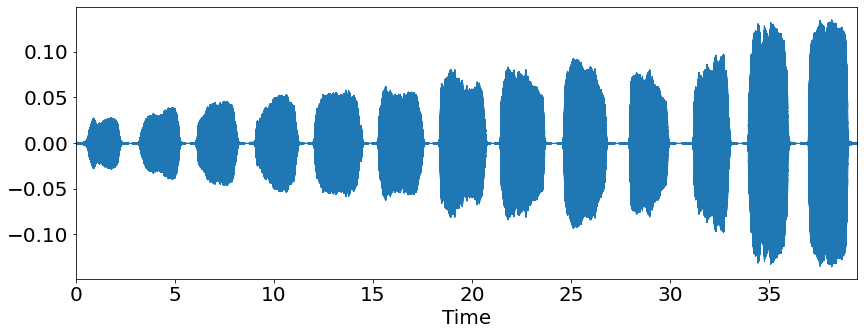

In [10]:
import librosa.display
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.waveplot(flute1, sr=sr_flute_1, ax=ax)

Observe que o nosso vetor tem mais ou menos 86000 quadros, ou posições.

In [11]:
flute1.shape

(869341,)

Como tal música foi amostrada com 22k quadros por segundo, basta fazer `86k/22k` para chegar na duração final. Isto deve ser próximo de 39 segundos, assim como é exemplificado no gráfico acima.

In [12]:
flute1.shape[0] / 22050

39.42589569160998

Vamos comparar com um um violino

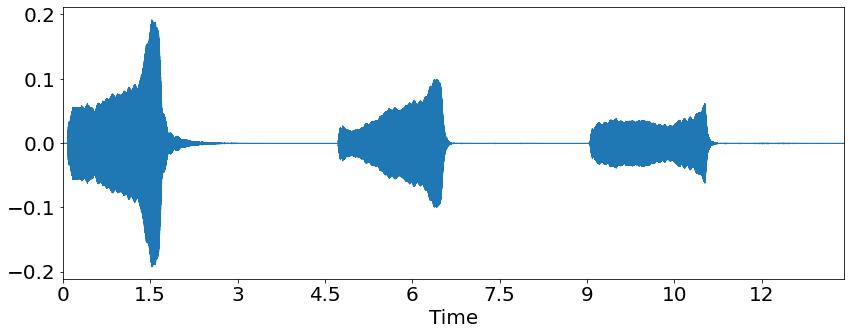

In [13]:
vio1, sr_vio_1 = librosa.load('instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav')
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax)

Nossa primeira tenativa de resolver este problema será em usar o vetor musical direto como atributos de um algoritmo de aprendizado de máquina. Com tal objetivo, já podemos observar alguns dos problemas que vamos ter ao fazer o processamento de músicas. 

O primeiro é que dependendo do caso, teremos `869341` atributos. Algo bem irreal de tratar com aprendizado de máquina simples. O segundo, também importante, é que cada arquivo tem uma duração diferente. Tal problema limita, por exemplo, o uso de algoritmos de aprendizado de máquina que necessitam da mesma quantidade de atributos por exemplo.

Tal problema motiva o uso de técnicas de MIR que convertem músicas em atributos mais simples. Assim, podemos aplicar técnicas de aprendizado de máquina. Até o momento no curso não vimos como tais técnicas funcionam, porém neste notebook podemos ter uma noção de qual é o fluxo de trabalho do profissional de MIR.

## Olhando o Espectograma

Para tratar com tais problemas, vamos então extrair atributos do [Espectograma](https://en.wikipedia.org/wiki/Spectrogram) da música. A extração de espectogramas será tratada ainda na primeira parte do curso. Observe os comentários das chamadas abaixo.

/home/abner/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abner/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abner/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


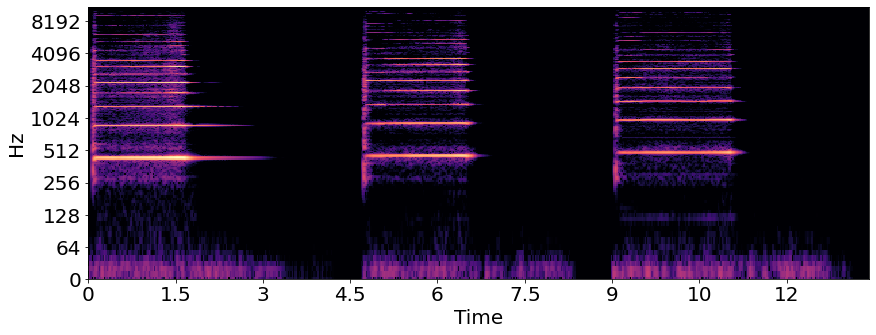

In [14]:
# Faça a transformada de Fourier do sinal. Assim pegamos "a quantidade" de sinal em cada frequência por segundo.
transform = librosa.stft(y=vio1)

# Como a transformada de fourier é um número complexo, multiplique os coeficientes.
S, phase = librosa.magphase(transform)

# Plote o espectograma
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
mesh = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), # intensidade da cor em decibéis
                                y_axis='log', x_axis='time', ax=ax)

Um atributo interessante é o centroide do espectograma. De forma simples, para cada janela de tempo tiramos o centroide da intensidade, convertendo assim o espectograma para um valor simples.

[Text(0.5, 1.0, 'log Power spectrogram')]

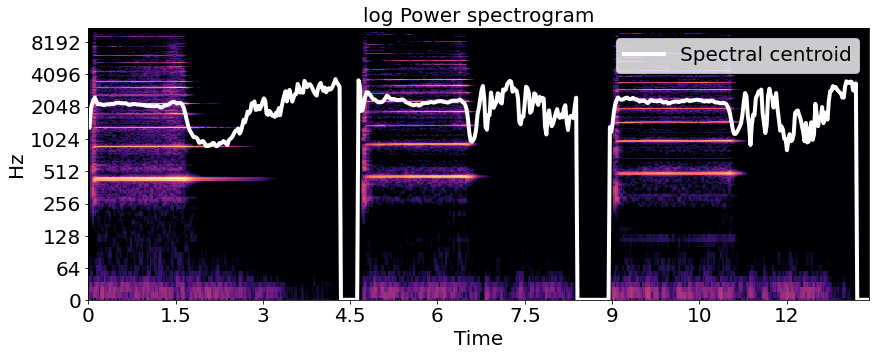

In [15]:
cent = librosa.feature.spectral_centroid(y=vio1)
times = librosa.times_like(cent)
S, phase = librosa.magphase(librosa.stft(y=vio1))

fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

Vamos comparar com outro instrumento.

[Text(0.5, 1.0, 'log Power spectrogram')]

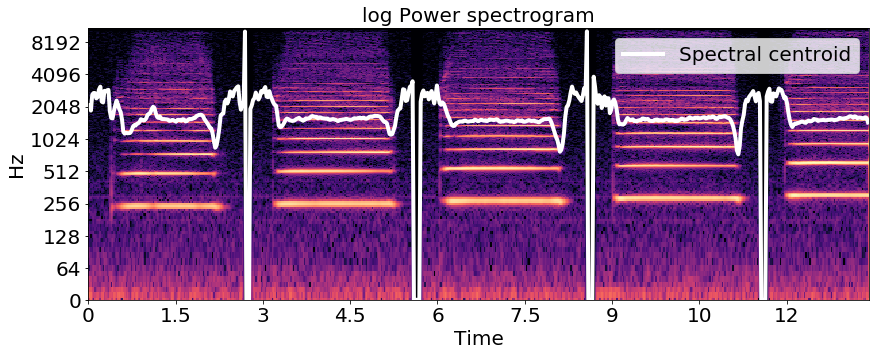

In [16]:
flute_trim = flute1[:len(vio1)] # Cortando a flauta para a mesma quantidade de tempo do violino

cent = librosa.feature.spectral_centroid(y=flute_trim)
times = librosa.times_like(cent)
S, phase = librosa.magphase(librosa.stft(y=flute_trim))

fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## Segmentando

Observe mais uma vez um único arquivo. Uma característica importante do mesmo é que a mesma nota é repetida várias vezes. Isto permite ampliar nossa base de dados caso tais segmentos sejam identificáveis. 

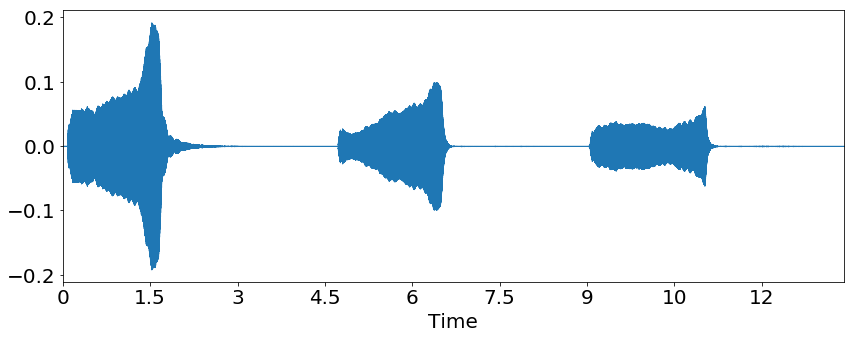

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax)

Vamos entender quantos elementos são zero e quantos são diferentes de zero. Um fator interessante de numpy é que podemos de forma muito simples criar vetores de booleanos.

In [18]:
is_zero = vio1 == 0
print(is_zero)
print(is_zero.sum())

[ True  True  True ...  True  True  True]
40924


Aqui são os diferentes de zero.

In [19]:
is_zero = vio1 != 0
print(is_zero.sum())

254897


Para mostrar a ideia da segmentação vamos usar um vetor mais simples.

```python
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
d = np.array(x == 0, dtype='i')
```

O vetor `d` vai ter a seguinte forma:

```array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int32)```

Ou seja, o mesmo vai ser 1 quando o elemento é zero em `x`. Vai ter valor 0 caso contrário.

Agora, observe as diferenças entre elementos consecutivos de `d`:

```
1 - 1 = 0 (isto quer dizer que temos dois zeros lado a lado)
0 - 1 = -1 (isto quer dizer que chegamos em um valor não zero)
1 - 0 = 1 (isto quer dizer que chegamos em um valor não zero)
```

Podemos criar esse vetor de forma simples com o comando `np.diff`.

In [20]:
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
d = np.array(x == 0, dtype='i')
np.diff(d, prepend=d[0]) # o prepend é para garantir a mesma dimensão de x

array([ 0,  0, -1,  0,  0,  1,  0, -1,  0,  1], dtype=int32)

Em absoluto

In [21]:
bg_ed = np.abs(np.diff(d, prepend=d[0]))

Como `bg_ed[2] == 1`, estamos indicando que algum sinal começa aqui. Olhe se não é verdade em:

```python
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
```

`x[2] = 2`. Agora, como `bg_ed[5] == 1`, estamos dizendo que o sinal termina em 5. Ou seja, de `[2:5]` é sinal!

`np.where` acha tal sinal!

In [22]:
idx = np.where(bg_ed)[0]
idx

array([2, 5, 7, 9])

Agora basta iterar par a par e achar os segmentos!

**o código até aqui só funciona se o sinal termina em zero, mas ok, dá para entender a ideia**

In [23]:
for i in range(0, len(idx), 2):
    if i + 1 < len(idx):
        bg = idx[i]
        ed = idx[i+1]
        
        print(x[bg:ed])

[2 3 4]
[4 5]


Agora podemos criar nossa função. A heurística acima não é perfeita pois o vetor das notas não é realmente zerado. De qualquer forma, podemos considerar que uma nota toca por pelo menos 1 segundo. Quantos quadros equivalem a um segundo? *A taxa de amostragem!*.

In [16]:
def segment(x, sr=22050):
    x = np.append([0], x)
    x = np.append(x, [0])
    d = np.array(x == 0, dtype='i')
    bg_ed = np.abs(np.diff(d, prepend=d[0]))
    idx = np.where(bg_ed)[0]
    for i in range(0, len(idx), 2):
        if i + 1 < len(idx):
            bg = idx[i]
            ed = idx[i+1]
            cand = x[bg:ed]
            
            if len(cand) >= sr:
                yield cand

Observe como temos várias notas em um único arquivo.

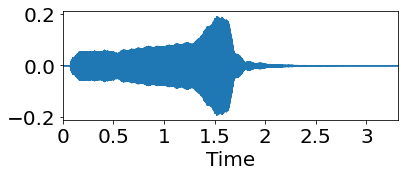

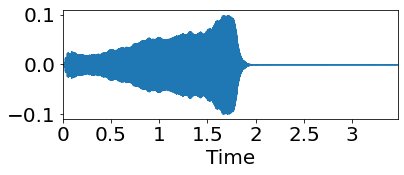

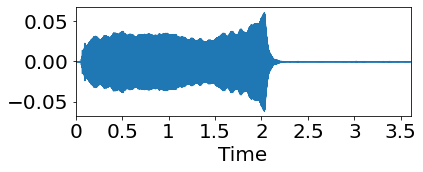

In [28]:
for note in segment(vio1):
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    librosa.display.waveplot(note, sr=sr_vio_1, ax=ax)
    plt.show()

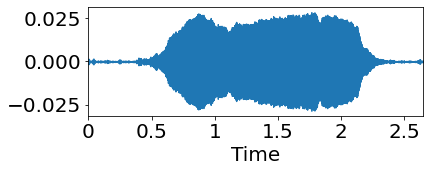

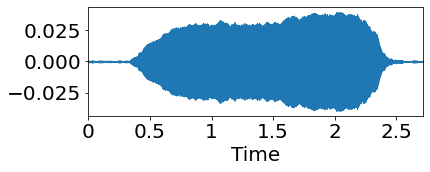

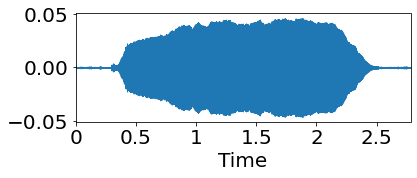

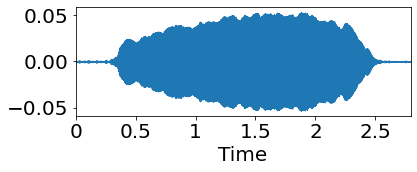

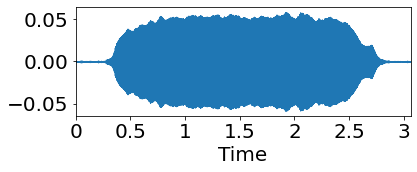

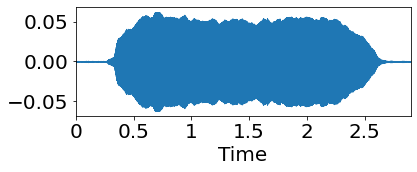

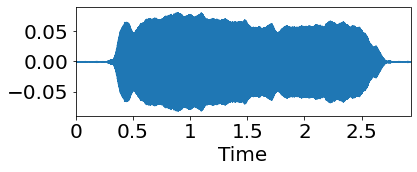

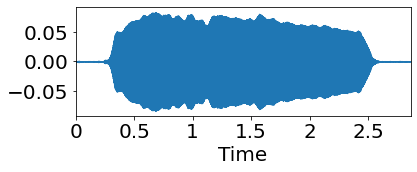

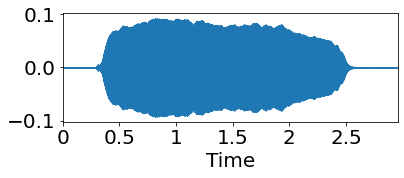

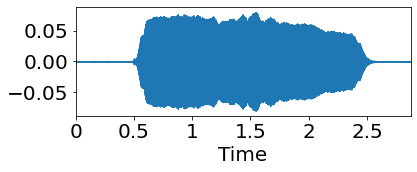

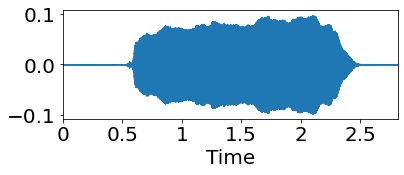

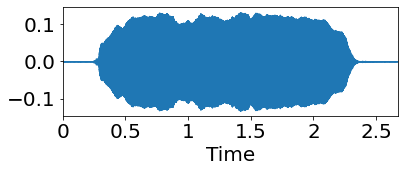

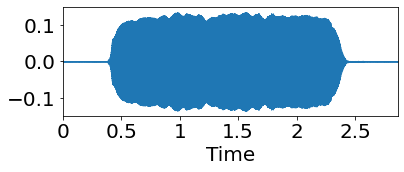

In [29]:
# eu não sei pq não funcionou com a flauta :-(
for note in segment(flute1):
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    librosa.display.waveplot(note, ax=ax)
    plt.show()

## Um Classificador Ainda sem Entender MIR com Detalhes

### Criando uma Base de Dados

Para começar nossa tarefa de um classificador ultra simples, primeiro temos que ler todo o conjunto de músicas. Aqui, o módulo [Glob](https://docs.python.org/3/library/glob.html) de Python vai ser útil. O mesmo permite uma navegação em todas as pastas de um diretório via expressões regulares.

In [30]:
import glob

Observe a chamada abaixo:
1. Na pasta instrument
1. Entre em quaquer, `*/`, subpasta
1. Além do mais, procure qualquer coisa em `wav`, `*.wav`.

In [31]:
glob.glob('instrument/*/*.wav')

['instrument/clarinet/EbClar.ff.C4B4.wav',
 'instrument/clarinet/EbClar.ff.C5B5.wav',
 'instrument/clarinet/EbClar.ff.C6A6.wav',
 'instrument/clarinet/EbClar.ff.G3B3.wav',
 'instrument/flute/flute.nonvib.ff.B3B4.wav',
 'instrument/flute/flute.nonvib.ff.C5B5.wav',
 'instrument/flute/flute.nonvib.ff.C6B6.wav',
 'instrument/flute/flute.nonvib.ff.C7Db7.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.A3.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.A4.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.A5.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.Ab3.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.Ab4.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.Ab5.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.B3.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.B4.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.B5.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.Bb3.stereo.wav',
 'instrument/vibraphone/Vibra

Agora um pouco de magia python para ler tudo. Explicando o código abaixo.

1. Leia o arquivo com LibRosa.
2. Guarde a taxa de amostragem em um conjunto
3. Separe o arquivo por instrumento em um dicionário

Além disso vamos nos limitar a 4 amostras por instrumento (primeiro if).

In [32]:
raw_data = {}
rates = set()
for fpath in glob.glob('instrument/*/*.wav'):
    inst_name = fpath.split('/')[1]
    if inst_name in raw_data and len(raw_data[inst_name]) == 10:
        continue
        
    audio, sr = librosa.load(fpath)
    rates.add(sr)
    
    if inst_name not in raw_data:
        raw_data[inst_name] = []
        
    raw_data[inst_name].append(audio)

Os exemplos tem tamanhos diferentes, já vamos tratar.

In [33]:
for inst in raw_data:
    print(inst)
    for aud in raw_data[inst]:
        print(len(aud))

clarinet
709504
681300
591255
302571
flute
869341
743425
682644
117184
vibraphone
24572
22097
20219
23467
19446
24682
24439
17125
20572
24262
violin
295821
1190781
871361
1170569
96423
1258567
1423538
420920
781379
1268779


Ok, agora vamos extrair o centroide espectral de cada arquivo. Como os arquivos tem tamanhos diferentes, cada centroide também vai ter tamanhos diferentes. Tais tamanhos são definidos pelo tamanho da janela utilizada para fazer a transformada de fourier (novamente, assunto futuro). Vamos observar qual o menor tamanho na base. Parece que é 30!

In [34]:
for inst in raw_data:
    for aud in raw_data[inst]:
        cent = librosa.feature.spectral_centroid(y=aud, sr=22000)
        print(cent.shape)

(1, 1386)
(1, 1331)
(1, 1155)
(1, 591)
(1, 1698)
(1, 1453)
(1, 1334)
(1, 229)
(1, 48)
(1, 44)
(1, 40)
(1, 46)
(1, 38)
(1, 49)
(1, 48)
(1, 34)
(1, 41)
(1, 48)
(1, 578)
(1, 2326)
(1, 1702)
(1, 2287)
(1, 189)
(1, 2459)
(1, 2781)
(1, 823)
(1, 1527)
(1, 2479)


Vamos criar um DataFrame pandas sem nada. O mesmo será usado para nosso classificador.

In [35]:
names = ['instrument']
for i in range(30):
    names.append(f'cent_{i}')
df = pd.DataFrame(columns=names)
df

Empty DataFrame
Columns: [instrument, cent_0, cent_1, cent_2, cent_3, cent_4, cent_5, cent_6, cent_7, cent_8, cent_9, cent_10, cent_11, cent_12, cent_13, cent_14, cent_15, cent_16, cent_17, cent_18, cent_19, cent_20, cent_21, cent_22, cent_23, cent_24, cent_25, cent_26, cent_27, cent_28, cent_29]
Index: []

[0 rows x 31 columns]

O código abaixo cola os 30 primeiros valores de cada centroid em uma linha do dataframe.

In [36]:
for inst in raw_data:
    for aud in raw_data[inst]:
        cent = librosa.feature.spectral_centroid(y=aud)
        row = {}
        for i in range(30):
            row[f'cent_{i}'] = cent[0, i]
        row['instrument'] = inst
        df = df.append(row, ignore_index=True)

In [37]:
df

instrument       cent_0       cent_1       cent_2        cent_3  \
0     clarinet     0.000000     0.000000     0.000000      0.000000   
1     clarinet     0.000000     0.000000     0.000000      0.000000   
2     clarinet     0.000000     0.000000     0.000000      0.000000   
3     clarinet     0.000000     0.000000     0.000000      0.000000   
4        flute  2055.855559  2123.145863  1882.832788   2641.616678   
5        flute     0.000000     0.000000     0.000000  10269.400727   
6        flute  2685.007593  2592.082458  2441.817147   2524.502381   
7        flute  2759.866509  2696.733730  2362.006968   2342.103259   
8   vibraphone  2001.425838  1918.827753  1559.785742   1333.944507   
9   vibraphone  2333.244376  2079.251570  1484.675714    990.774810   
10  vibraphone  1850.989597  1629.977297  1208.462007   1114.105907   
11  vibraphone  2015.551639  1903.425799  1584.359237   1391.585204   
12  vibraphone  2195.786451  1933.467877  1246.723975    790.728828   
13  vibraphone  1712.767846  1492.584009  1046.560331    951.214549   
14  vibraphone  1824.684082  1694.029937  1271.897811   1039.534426   
15  vibraphone  1901.810643  1582.647280   960.982356    853.285749   
16  vibraphone  1800.752713  1632.101960  1306.916623   1221.381812   
17  vibraphone  2109.721623  1953.298596  1448.393737   1184.021961   
18      violin  1443.653414  1301.160715  1984.960489   2185.082860   
19      violin     0.000000     0.000000     0.000000      0.000000   
20      violin     0.000000     0.000000     0.000000      0.000000   
21      violin     0.000000     0.000000     0.000000      0.000000   
22      violin     0.000000     0.000000     0.000000      0.000000   
23      violin  1879.888159  2136.316519  2070.269266   1881.376786   
24      violin     0.000000     0.000000     0.000000      0.000000   
25      violin     0.000000     0.000000     0.000000      0.000000   
26      violin  1444.337825  2513.701909  3279.773939   3711.430199   
27      violin     0.000000  1099.358533  1434.120234   1446.451420   

         cent_4       cent_5       cent_6       cent_7       cent_8  ...  \
0      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
1      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
2      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
3      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
4   2739.212794  2739.549429  2443.067988  2512.382709  2959.904325  ...   
5   1904.814588  2220.859214  2496.618525  2354.613023  2513.407641  ...   
6   2293.488729  2658.102350  2209.608792  2031.644150  2392.827416  ...   
7   2913.388354  2758.974010  2680.841241  2871.680327  2261.126279  ...   
8   1237.797560  1192.680489  1182.355252  1191.269046  1191.549410  ...   
9    876.522576   838.544512   813.796429   797.129607   774.161574  ...   
10  1064.107027  1059.320644  1029.454385  1015.797284  1032.129225  ...   
11  1330.344528  1282.060456  1289.334216  1323.179903  1397.938054  ...   
12   708.608481   668.172241   651.640879   647.102327   632.037841  ...   
13   940.568819   937.559906   931.660139   926.355200   913.933281  ...   
14   952.416909   887.258905   791.629424   686.341349   648.864038  ...   
15   781.003975   740.877337   729.476371   700.856480   673.336238  ...   
16  1178.372871  1163.278060  1124.887276  1099.467102  1098.286401  ...   
17  1101.687584  1025.462385   973.262643   962.404117   988.880765  ...   
18  2384.303106  2476.085016  2314.099460  2156.263331  2165.738403  ...   
19     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
20     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
21     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
22     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
23  1661.646696  1612.731109  1641.491499  1566.612972  1520.868702  ...   
24     0.000000     0.000000     0.000000   

### Ufa! Finalmente, vamos classificar!

Agora podemos passar para o o nosso classificador. Observe no código abaixo como **a média das 30 janelas da média do espectograma**, leia isso com calma, é bem diferente para cada instrumento. O código usa pandas para:

1. Selecionar as 4 amostras de cada instrumento.
2. Tirar a média dos valores em cada coluna, a média da média do espectograma.

Tal diferença indica que deve ser possível fazer um trabalho até razoável de classificação com essa base.

In [38]:
for inst in raw_data:
    sub_df = df[df['instrument'] == inst]
    media = sub_df.mean(axis='columns')
    print(inst)
    print(media)
    print()

clarinet
0      0.000000
1    765.271926
2      0.000000
3     52.247478
dtype: float64

flute
4    2159.448546
5    2118.381728
6    2176.151612
7    3006.946173
dtype: float64

vibraphone
8     1553.319593
9     1306.586949
10    1590.319102
11    1713.965269
12    1090.529052
13    1111.029622
14    1390.385908
15    1572.603405
16    1539.213841
17    1628.567965
dtype: float64

violin
18    2137.529951
19    1276.899906
20    1593.282463
21     831.217159
22    1370.882052
23    1554.568062
24    1111.303218
25     578.730964
26    2691.021045
27    1733.222108
dtype: float64



In [39]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
df

instrument    cent_0    cent_1    cent_2    cent_3    cent_4    cent_5  \
0     clarinet -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
1     clarinet -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
2     clarinet -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
3     clarinet -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
4        flute  0.889194  0.984942  0.920540  0.652056  1.695342  1.735642   
5        flute -1.114263 -1.170435 -1.089428  4.510587  0.862476  1.208212   
6        flute  1.502311  1.460997  1.517268  0.592814  1.250436  1.652823   
7        flute  1.575262  1.567237  1.432069  0.500547  1.869198  1.755394   
8   vibraphone  0.836152  0.777522  0.575679 -0.009432  0.196683  0.162709   
9   vibraphone  1.159513  0.940381  0.495498 -0.183025 -0.163929 -0.197394   
10  vibraphone  0.689550  0.484287  0.200633 -0.120638  0.023311  0.027102   
11  vibraphone  0.849918  0.761886  0.601912  0.019725  0.289060  0.253595   
12  vibraphone  1.025559  0.792384  0.241479 -0.284219 -0.331535 -0.370637   
13  vibraphone  0.554851  0.344808  0.027799 -0.203037 -0.100000 -0.096710   
14  vibraphone  0.663915  0.549312  0.268352 -0.158360 -0.088174 -0.147859   
15  vibraphone  0.739076  0.436238 -0.063557 -0.252574 -0.259272 -0.296707   
16  vibraphone  0.640593  0.486443  0.305736 -0.066372  0.137367  0.132811   
17  vibraphone  0.941688  0.812516  0.456766 -0.085271  0.060823 -0.007326   
18      violin  0.292596  0.150478  1.029563  0.421118  1.341084  1.467739   
19      violin -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
20      violin -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
21      violin -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
22      violin -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
23      violin  0.717712  0.998312  1.120632  0.267487  0.619754  0.589838   
24      violin -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
25      violin -1.114263 -1.170435 -1.089428 -0.684211 -1.038843 -1.050067   
26      violin  0.293263  1.381427  2.411807  1.193224  2.366189  1.715044   
27      violin -1.114263 -0.054387  0.441529  0.047480  0.619616  0.916397   

      cent_6    cent_7    cent_8  ...   cent_20   cent_21   cent_22   cent_23  \
0  -1.063355 -1.054968 -1.043842  ... -1.730471 -2.026789 -2.053593 -2.122694   
1  -1.063355 -1.054968 -1.043842  ... -1.730471  0.146816  0.211185  0.172706   
2  -1.063355 -1.054968 -1.043842  ... -1.730471 -2.026789 -2.053593 -2.122694   
3  -1.063355 -1.054968 -1.043842  ... -1.730471 -2.026789 -2.053593 -2.122694   
4   1.556700  1.693734  2.144733  ...  0.604359  0.765828  0.516908  0.229340   
5   1.614130  1.521124  1.663742  ... -0.233427 -0.403985 -0.350339 -0.362037   
6   1.306328  1.167776  1.533846  ...  0.368749  0.205808  0.153795  0.109457   
7   1.811699  2.086828  1.391970  ...  1.734543  1.705752  1.741193  1.742689   
8   0.204655  0.248354  0.239762  ...  0.155231 -0.012538  0.005580  0.039458   
9  -0.190603 -0.182859 -0.209872  ... -0.653930 -0.627498 -0.334637  0.062422   
10  0.040678  0.056377  0.068026  ...  0.176248  0.245964  0.379418  0.520558   
11  0.319384  0.392673  0.462095  ...  0.227263  0.195678  0.174042  0.255188   
12 -0.364506 -0.346998 -0.362975  ... -0.914541 -1.055107 -0.928936 -0.745483   
13 -0.064201 -0.041478 -0.059302  ... -0.603225 -0.771726 -0.764384 -0.750851   
14 -0.214376 -0.304068 -0.344849  ...  0.070864 -0.021130  0.012080  0.115363   
15 -0.281032 -0.288188 -0.318486  ...  0.702745  1.028189  1.294082  1.331449   
16  0.143024  0.147917  0.139294  ... -0.019594 -0.041056  0.078238  0.208532   
17 -0.019585 -0.002038  0.021436  ...  0.085603  0.126664  0.361962  0.447982   
18  1.418388  1.304117  1.289213  ...  0.715935  0.649933  0.603238  0.571147   
19 -1.063355 -1.054968 -1.043842  ...  0.560550  0.313913  0.327938  0.342652   
20 -1.063355 -1.054968 -1.043842  ...  1

Vamos gerar X e y

In [40]:
cat = pd.Categorical(df['instrument'])
y = cat.codes
X = df.iloc[:, 1:].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.50)

Finalmente e por fim, vamos de Sklearn!

In [42]:
from sklearn.linear_model import LogisticRegressionCV

In [43]:
model = LogisticRegressionCV()
model = model.fit(X_train, y_train)

/home/abner/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [44]:
model.predict(X_test)

array([0, 3, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 1, 3], dtype=int8)

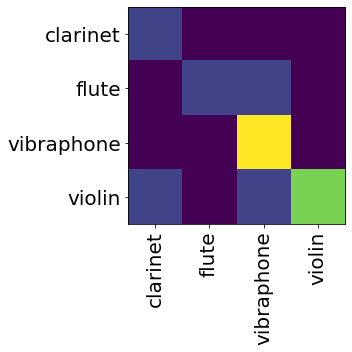

In [45]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.xticks([0, 1, 2, 3], cat.categories, rotation=90)
plt.yticks([0, 1, 2, 3], cat.categories);

## Tarefas

1. Altere o código acima para extrair mais features usando LibRosa
1. Compare outros classificadores via SKLearn
1. Adicione mais exemplos
   1. Aqui você pode pegar diferentes partes de um mesmo áudio para aumentar a base

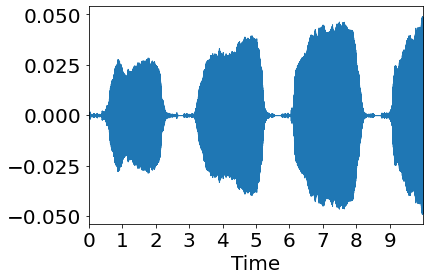

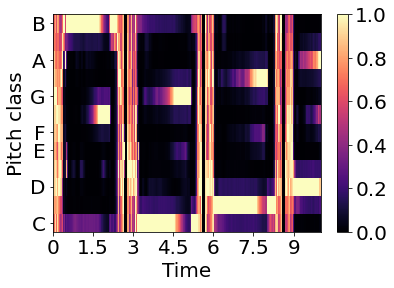

In [61]:
flu = flute1[:sr_flute_1*10] #só os primeiros 10 segundos
librosa.display.waveplot(flu)
chroma = librosa.feature.chroma_stft(flu)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
fig.colorbar(img)

## Referências

O notebook acima foi inspirado no curso da MTG.

1. https://github.com/MTG/MIRCourse/blob/master/notebooks/Lecture1_IntroWithACaseStudy.ipynb